**LabDS03b**

Considerieng several variables corresponding to international indicator. The purpose of this study is identifying the best model to predict if a country is a good country in what concerns Co2 emissions.



1. Import data 

Import data and create new varible (discretize variable)

In [1]:
#Importar bibliotecas
import pandas as pd
import numpy as np

In [2]:
#Buscar um subgrupo de dados
url='Mundo94Var.xls'
df=pd.read_excel(url)

In [3]:
#Classificar 
XY=df[['CO2 emissions (metric tons per capita)',
        'Urban population (% of total population)',
        'Population density (people per sq. km of land area)',
        'Secure Internet servers (per 1 million people)',
        'Mobile cellular subscriptions (per 100 people)',
        'Life expectancy at birth, total (years)',
        'Access to electricity (% of population)'
       ]]

XY=XY.dropna()

#Fazer a descaracterizacao - Dividir os dados
#Variavel de natureza continua
Y=np.digitize(XY['CO2 emissions (metric tons per capita)'],[np.average(XY['CO2 emissions (metric tons per capita)'])])
#Eliminar variavel
Xfeatures=XY.drop(['CO2 emissions (metric tons per capita)'],axis=1)

2. Standardize data

In [4]:
#Standardizacao - usando o sklearn
from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X=standardizer.fit_transform(Xfeatures)

3. Model Selection

All the models are compared. 

In [5]:
#Importar bibliotecas
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Criar uma lista por todos os modelos - Lista de tupulo
#Dentro do tupolo tenho uma funcao
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Outra lista com resultados
#Exatidao
results = []
names = []
scoring = 'accuracy'
#seed = 7
#Model selection usar o kfolde e o crossvalidation
#Posso analisa a minha amostra que esta dividida em varias componenetes
#Para evitar problemas de overfiting
#kfolder = quero dividar a amostra em 10 partes - Treino e teste
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#O melhor sera o KNN, NVM e depois o NB

KNN: 0.804678 (0.075457)
NB: 0.745322 (0.078136)
SVM: 0.799123 (0.079186)


4. Plot using box plot

All ths models are compared.

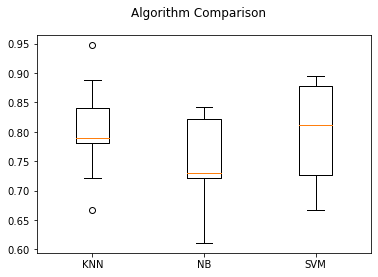

In [6]:
import matplotlib.pyplot as plt
#Model selection
#Fazer comparacao em termos graficos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

5. Best model selected

Beste model was selected and fitted

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#Analise mais detalhada
#Verificar em que medida o meu valor e melhor para prever
#30%teste e 70%treino
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
#usar treuno para fazer o fit do modelo
model = KNeighborsClassifier()
result=model.fit(X_train,y_train)
#Aplicar o modelo aos dados de teste
y_pred = model.predict(X_test)

the confusion matrix calculated


In [8]:
from sklearn.metrics import confusion_matrix
#Matriz confusao 
confusion_matrix(y_test, y_pred)

array([[36,  8],
       [ 3,  9]])

confusion matrix plot

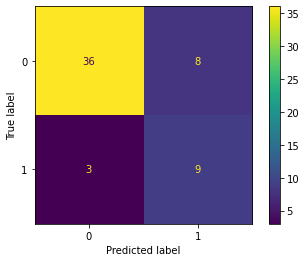

In [9]:
#Fazer matriz confusao - Muito importante
#Relacionar os valores previstos com os valores reais
#Matriz resulta das amostras de teste
#Faz a ligacao entre o que nos prevemos e o que acontece realmente
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test) 